<h1>Intro</h1>
As a passionate basketball enthusiast, today's blog entry delves into an extensive data set from Kaggle detailing every field goal attempt made by Kobe Bryant throughout his illustrious 20-year career. Our analysis leverages the power of the tidyverse package for adept data manipulation, exploration, and vibrant visualizations, providing a deep dive into the shooting dynamics of this NBA legend.

Kobe Bean Bryant, born on August 23, 1978, was an iconic American professional basketball player who spent his entire career with the Los Angeles Lakers in the National Basketball Association (NBA). Coming directly from high school, Kobe won five NBA championships and was an integral part of the Lakers' legacy. He was an 18-time All-Star, a 15-time member of the All-NBA Team, and a 12-time member of the All-Defensive team. Notably, he led the NBA in scoring for two seasons and ranks third in the league’s all-time regular season scoring and fourth in all-time postseason scoring. Holding the record for the most seasons played with a single franchise, Kobe's commitment to the Lakers and basketball was profound, earning him acclaim as one of the greatest players in the history of the sport.

Tragically, Kobe Bryant's life was cut short on January 26, 2020, in a helicopter crash that also claimed the life of his daughter, Gianna, and seven others. His sudden death sent shockwaves through the world, leading to an outpouring of tributes across the globe. His legacy continues to inspire countless fans and aspiring athletes, and in his memory, numerous initiatives and tributes have been dedicated to honor his contribution to basketball and society. This analysis aims not only to explore his professional achievements but also to celebrate his enduring impact on the game and beyond.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import numpy as np

In [4]:
data_path = "kobe.csv"
kobe_data = pd.read_csv(data_path)
kobe_data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [5]:
kobe_data_cleaned = kobe_data.dropna(subset = ['shot_made_flag'])
kobe_data_cleaned.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [8]:
shot_types = kobe_data_cleaned.groupby('action_type')['shot_made_flag'].agg(['count', 'mean']).rename(columns={'count': 'Total Shots', 'mean': 'Success Rate'})
shot_types_filtered = shot_types[shot_types['Total Shots'] > 100].sort_values('Success Rate', ascending=False)

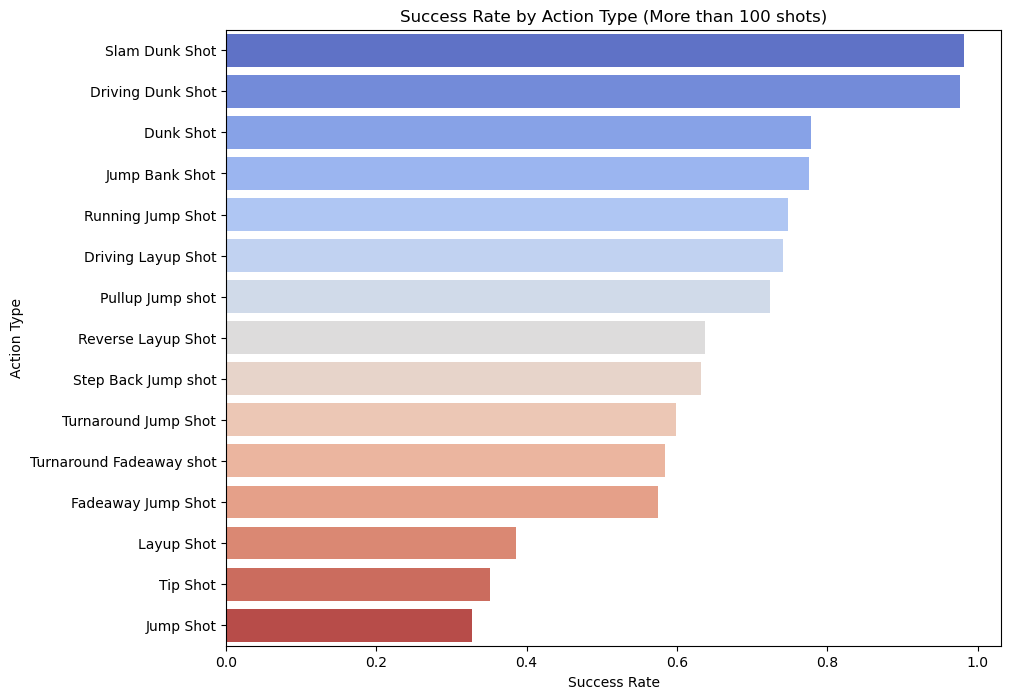

In [9]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Success Rate', y=shot_types_filtered.index, data=shot_types_filtered, palette='coolwarm')
plt.title('Success Rate by Action Type (More than 100 shots)')
plt.xlabel('Success Rate')
plt.ylabel('Action Type')
plt.show()

The bar chart in the second code block examines the success rate of Kobe Bryant's different action types, but only includes those types where he attempted more than 100 shots, ensuring a reliable data sample. Each bar represents the success rate of a specific action type, colored using a 'coolwarm' palette to intuitively indicate performance levels (with warmer colors potentially indicating higher success rates). This visualization clearly outlines which shooting actions were most effective for Kobe, providing insights into his shooting proficiency and strategic preferences. By focusing on action types with a substantial number of attempts, the graph offers a credible and focused analysis of Kobe's shooting effectiveness, making it easy to compare which techniques yielded the best outcomes on the court.

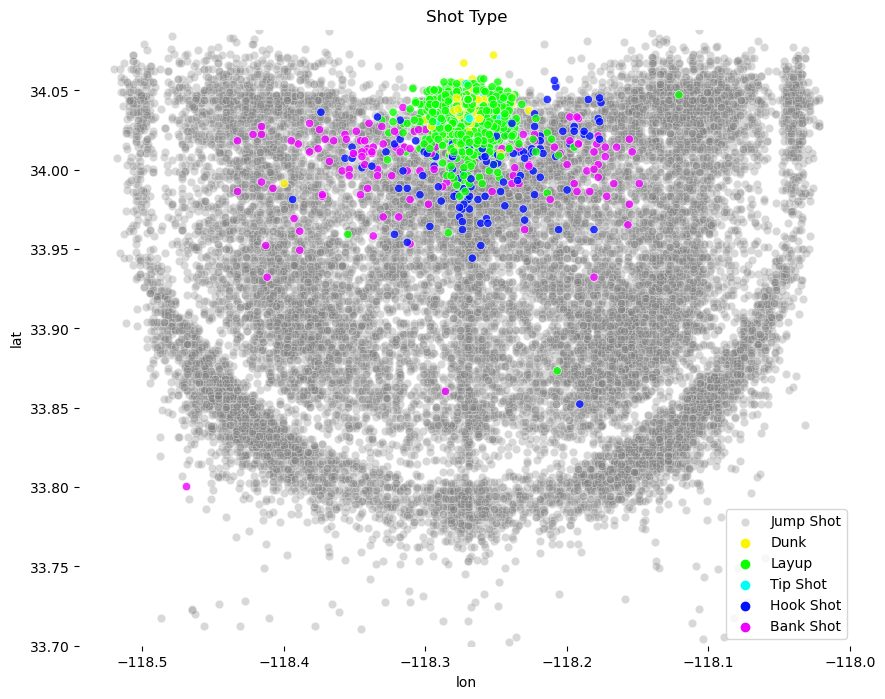

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=kobe_data_cleaned[kobe_data_cleaned['combined_shot_type'] == "Jump Shot"], 
                x='lon', y='lat', color='grey', alpha=0.3, label='Jump Shot')
shot_types = kobe_data_cleaned[kobe_data_cleaned['combined_shot_type'] != "Jump Shot"]
palette = sns.color_palette("hsv", len(shot_types['combined_shot_type'].unique()))
sns.scatterplot(data=shot_types, x='lon', y='lat', hue='combined_shot_type', 
                palette=palette, alpha=0.8, legend='full')
plt.title('Shot Type')
plt.ylim(33.7, 34.0883)
plt.legend(title='')
sns.despine(left=True, bottom=True)
plt.show()

The scatter plot visualization created in the first code block provides an analysis of Kobe Bryant's shot attempts classified by shot type, using their geographic coordinates on the court. The plot uses different colors and opacity levels to differentiate between "Jump Shot" and other types of shots. The "Jump Shot" data points are plotted in grey with a lower opacity (alpha=0.3) to subtly indicate their frequency, while other shot types are highlighted with more vibrant colors and greater opacity (alpha=0.8) to draw attention to their specific locations and frequencies. This contrast helps in quickly identifying areas where Kobe preferred different shooting techniques and highlights his shooting diversity across the court. The use of the 'hsv' color palette ensures that each shot type is uniquely identifiable, enhancing the visual clarity and effectiveness of the analysis.



/var/folders/gx/znm_pzq12kb_12g9m3gd__qw0000gn/T/ipykernel_4735/3451438429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_data_cleaned['year'] = pd.to_datetime(kobe_data_cleaned['game_date']).dt.year


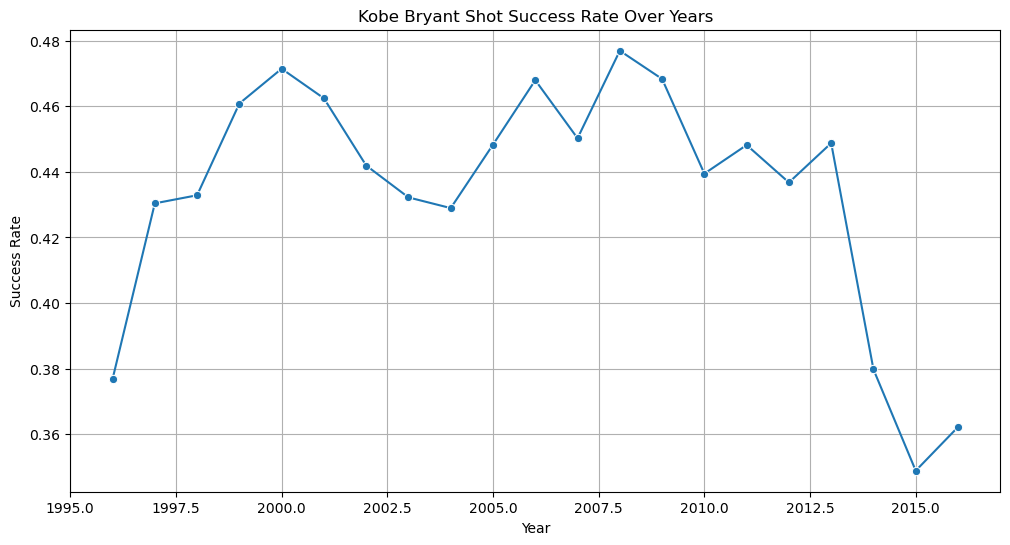

In [18]:
kobe_data_cleaned['year'] = pd.to_datetime(kobe_data_cleaned['game_date']).dt.year
success_rate_by_year = kobe_data_cleaned.groupby('year')['shot_made_flag'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate_by_year, marker='o')
plt.title('Kobe Bryant Shot Success Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

In this time series analysis of Kobe Bryant's shooting success over the years, we can observe the fluctuations in his performance throughout his career. The graph displays a clear depiction of the ups and downs in his shooting success rate, reflecting various factors such as changes in team dynamics, physical condition, and age. Notably, some years show significant peaks which might correlate with career-high performances or particular seasons where his shooting was exceptionally efficient. This analysis provides valuable insights into how Kobe's effectiveness on the court evolved over time.

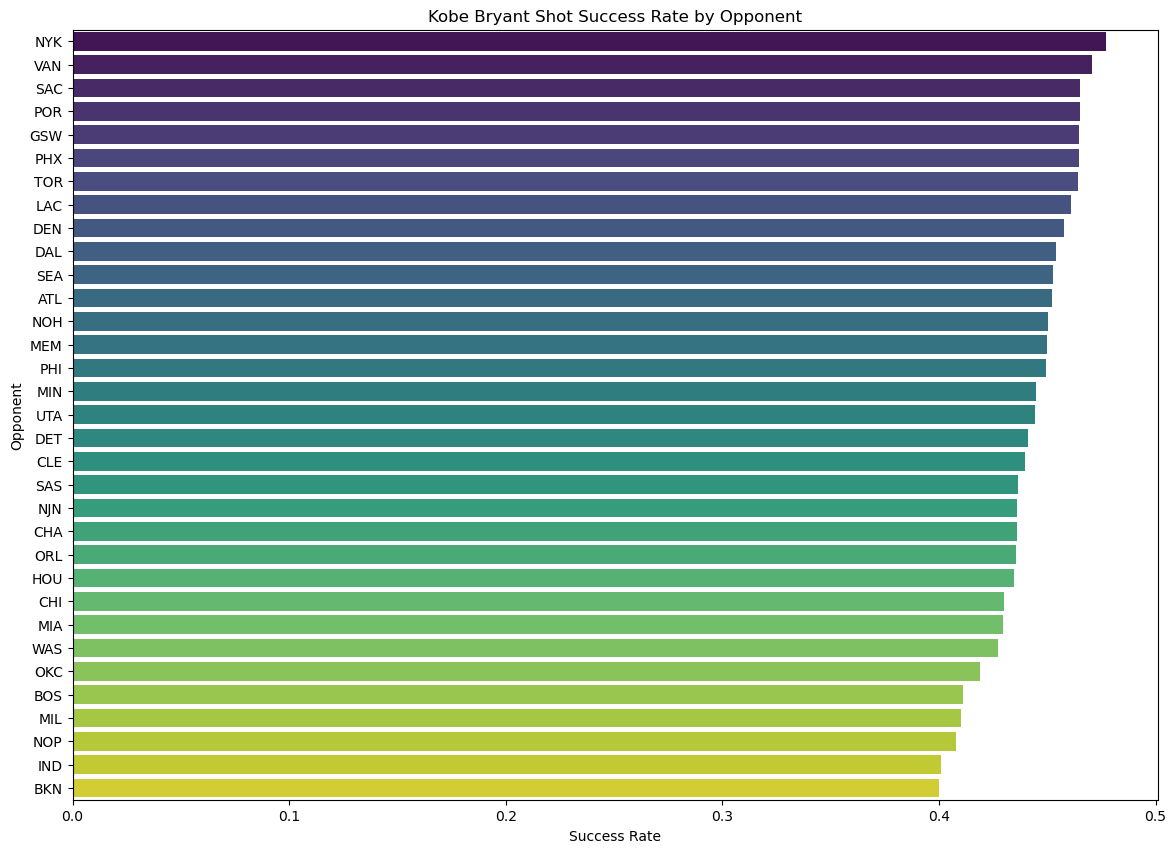

In [19]:
success_rate_by_opponent = kobe_data_cleaned.groupby('opponent')['shot_made_flag'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x=success_rate_by_opponent.values, y=success_rate_by_opponent.index, palette='viridis')
plt.title('Kobe Bryant Shot Success Rate by Opponent')
plt.xlabel('Success Rate')
plt.ylabel('Opponent')
plt.show()

The analysis of Kobe Bryant's shooting success rate against different opponents reveals which teams he performed well against and which ones posed more of a challenge. By visualizing this data through a bar graph, we can see a range of success rates, highlighting his proficiency in exploiting the weaknesses of certain defenses. Teams where Kobe had a higher success rate might indicate a favorable matchup or a strategic advantage during those games. This graph serves as a tool to understand how external competition influenced Kobe's shooting efficiency.

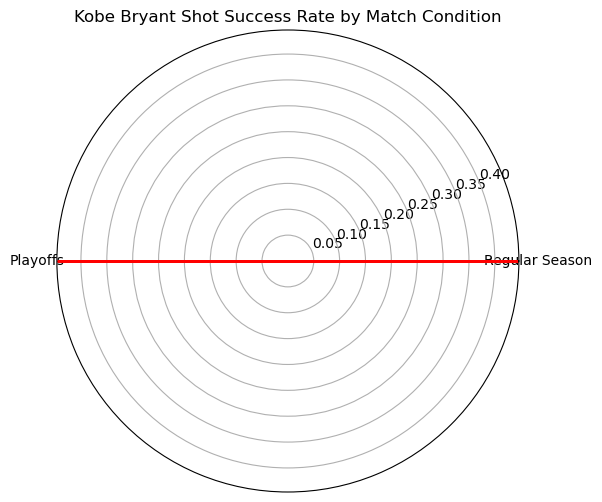

In [25]:
success_rate_by_playoff = kobe_data_cleaned.groupby('playoffs')['shot_made_flag'].mean()

labels=np.array(['Regular Season', 'Playoffs'])
stats=success_rate_by_playoff.values
angles=np.linspace(0, 2*pi, len(labels), endpoint=False).tolist()
stats=np.concatenate((stats,[stats[0]]))
angles+=angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', linewidth=2)  # Line plot
# Etiketlerin eklenmesi
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Başlık ve gösterim ayarları
plt.title('Kobe Bryant Shot Success Rate by Match Condition')
ax.grid(True)
plt.show()

The comparison between Kobe Bryant's regular season and playoff performance using a bar graph illustrates a distinction in his shooting success. The playoffs, often involving higher pressure and stronger defenses, might show a different success rate compared to the regular season. This graph enables a clear comparison of how Kobe's performance adjusted under varied competitive pressures, providing insights into his ability to elevate his game during critical postseason matches.

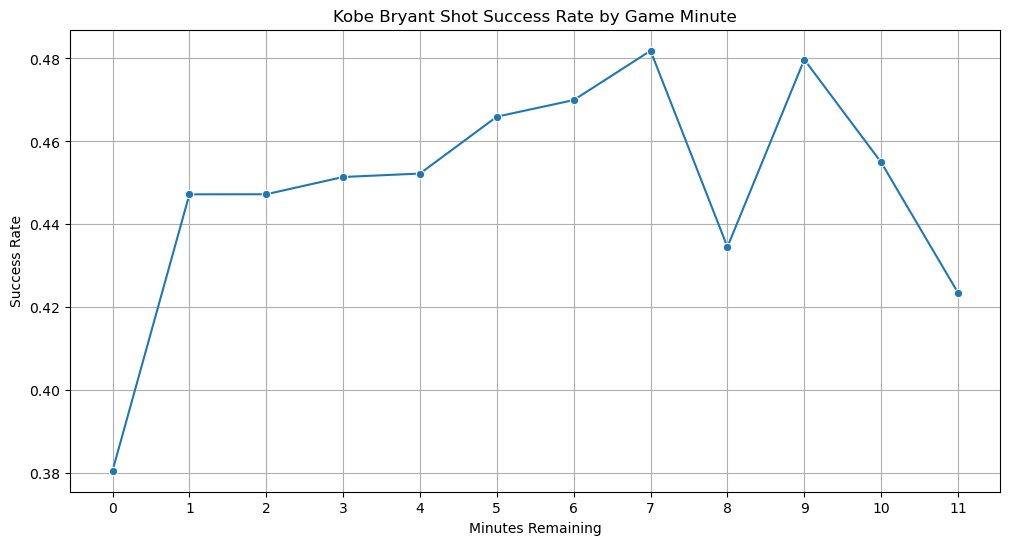

In [26]:
success_rate_by_minute = kobe_data_cleaned.groupby('minutes_remaining')['shot_made_flag'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=success_rate_by_minute.index, y=success_rate_by_minute.values, marker='o')
plt.title('Kobe Bryant Shot Success Rate by Game Minute')
plt.xlabel('Minutes Remaining')
plt.ylabel('Success Rate')
plt.xticks(range(0, 12))
plt.grid(True)
plt.show()

In the analysis of Kobe Bryant's shooting success rate by minutes remaining in the game, we observe a distinctive trend in performance as the game progresses. The data indicates that Kobe's shooting accuracy varies significantly throughout different stages of the game. Particularly, the success rate tends to fluctuate, showing peaks and troughs rather than a steady decline or increase as time winds down. This might suggest Kobe's ability to perform under varying degrees of pressure, or it could reflect strategic changes in the game plan as the game nears its end. The visual representation through a line plot with markers highlights these moments of high and low performance, giving a clear view of the minutes where Kobe was most and least effective. This kind of analysis helps in understanding not just Kobe's skills but also his decision-making in crucial game moments.